In [6]:
# loading the required libraries 
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
from wordcloud import WordCloud
from collections import Counter

# loadingh main dataset
df = pd.read_csv("bb_data_2015_2025.csv") 

In [7]:
# performing basic cleaning 
def clean_for_llm(text):
    if pd.isnull(text):
        return ""
    text = text.lower()                                       # coverting to lower case
    text = contractions.fix(text)                             # Expand contractions (don't as do not)
    text = re.sub(r"http\S+|www\S+", "", text)                # Remove URLs
    text = re.sub(r"\S+@\S+", "", text)                       # Remove emails
    text = re.sub(r"[^\x00-\x7F]+", " ", text)                # Remove emojis/non-ASCII
    text = re.sub(r"^\w+:\s*", "", text)                      # Remove speaker prefixes (e.g., "Croix:")
    text = re.sub(r">.*", "", text)                           # Remove quoted replies 
    text = re.sub(r"\s+", " ", text)                          # Collapse extra whitespace
    text = re.sub(r"(.)\1{2,}", r"\1\1", text)                # Normalize elongated words (e.g., "soooo" → "soo")
    return text.strip()


In [8]:
# applying cleaning to the required columns for LLM model
for col in ["post_content", "comments_content", "authors_comment"]:
    df[f"{col}_llm"] = df[col].astype(str).apply(clean_for_llm)

In [9]:
# Split Comments and Authors
df["comment_list"] = df["comments_content"].str.split(r"\s*\|\|\|\s*")
df["comment_authors"] = df["comment_authors"].str.split(r"\s*\|\|\|\s*")
df["post_timestamp"] = pd.to_datetime(df["post_timestamp"], format="%d-%m-%Y %I:%M %p", errors='coerce')


In [10]:
df.head(10)

,forum_name,thread_id,post_content,author,post_timestamp,no_of_comments,comments_content,authors_comment,comment_authors,post_content_llm,comments_content_llm,authors_comment_llm,comment_list
0,anxiety,180185,And it was entirely my own fault. I tried cro...,grovi,2016-05-21 14:59:00,5,pipsy: Hi grovi. I'm so sorry for you with ha...,NaN,"[pipsy, Dwwmills, Mummybee, hussyawan1122, Gue...",and it was entirely my own fault. i tried cros...,hi grovi. i am so sorry for you with having ha...,nan,[pipsy: Hi grovi. I'm so sorry for you with h...
1,anxiety,444348,Hi everyone I need some advice. For 3 years I ...,bundychikk,2019-10-30 12:26:00,6,"white knight: Hi, welcome Yes, it can be very ...",NaN,"[white knight, Gizz_36, shygirlk, music_man, j...",hi everyone i need some advice. for 3 years i ...,"white knight: hi, welcome yes, it can be very ...",nan,"[white knight: Hi, welcome Yes, it can be very..."
2,anxiety,433784,"Hi everyone, Thanks for letting me post on thi...",Mindful_Momma,2019-08-26 10:17:00,5,Croix: Dear Mindful Momma~ Welcome to the Foru...,Thanks Croix. You are correct. They haven't fo...,"[Croix, Croix, Croix, Croix, Croix]","hi everyone, thanks for letting me post on thi...","dear mindful momma~ welcome to the forum, i am...",thanks croix. you are correct. they have not f...,[Croix: Dear Mindful Momma~ Welcome to the For...
3,anxiety,459396,"hey there, what physical symptoms of anxiety d...",annabay,2019-10-22 19:25:00,9,Jill_G: Hi Annabay With my anxiety my most phy...,NaN,"[Jill_G, littlemissoverthink, Jill_G, smallwol...","hey there, what physical symptoms of anxiety d...",hi annabay with my anxiety my most physical sy...,nan,[Jill_G: Hi Annabay With my anxiety my most ph...
4,anxiety,477090,"I am really struggling at the moment, about a...",Unforgettable_fire,2019-11-21 13:15:00,2,Croix: Dear Unforgettable fire~ I'm so sorry y...,NaN,"[Croix, Guest_10130]","i am really struggling at the moment, about a ...",dear unforgettable fire~ i am so sorry your mu...,nan,[Croix: Dear Unforgettable fire~ I'm so sorry ...
5,anxiety,355492,Hey all... I have been getting this really od...,Guest_41,2017-11-22 23:11:00,6,"BballJ: Hi Midnightmoon, Sorry to read what yo...","Hi, No it doesn't feel like pins and needles i...","[BballJ, Mathy, MsPurple, Breekim, Mathy, BballJ]",hey all.. i have been getting this really odd ...,"hi midnightmoon, sorry to read what you are go...","hi, no it does not feel like pins and needles ...","[BballJ: Hi Midnightmoon, Sorry to read what y..."
6,anxiety,382373,"Hey guys, First post here, I am a 26 year old...",Merkles,2018-09-12 14:07:00,7,Hang10: Hi Merkles Welcome to Beyond Blue ch...,"Thank you for the replies guys, it really does...","[Hang10, Hugoosey, manoody92, SammyD100, baet1...","hey guys, first post here, i am a 26 year old ...",hi merkles welcome to beyond blue champion. i ...,"thank you for the replies guys, it really does...",[Hang10: Hi Merkles Welcome to Beyond Blue c...
7,anxiety,253512,For the last couple of weeks I've been having ...,Inner_strength,2016-10-18 19:40:00,6,blondguy: Hello Inner Strength Welcome to the ...,Thanks Paul for responding . I do try to avoi...,"[blondguy, MsPurple, blondguy, MsPurple, Leets...",for the last couple of weeks i have been havin...,hello inner strength welcome to the forums and...,thanks paul for responding . i do try to avoid...,[blondguy: Hello Inner Strength Welcome to the...
8,anxiety,434574,"Hi everyone, Not sure if this is the right pla...",99isthebest,2019-08-27 07:20:00,3,White_Rose: Dear 99isthebest Welcome to the fo...,"Thanks for the information and support, I appr...","[White_Rose, romantic_thi3f, Guest_55720927]","hi everyone, not sure if this is the right pla...","dear 99isthebest welcome to the forum, so glad...","thanks for the information and support, i appr...",[White_Rose: Dear 99isthebest Welcome to the f...
9,anxiety,402180,I have been diagnosed with OCD which largely c...,Guest_99,2019-01-23 23:10:00,5,"geoff: Hello Gues

In [11]:
# saving cleaned data to new file 
df.to_csv("cleaned_bb_data_2015_2025.csv", index=False)
print("Final cleaned dataset saved as cleaned_bb_data_2015_2025.csv")


Final cleaned dataset saved as cleaned_bb_data_2015_2025.csv


In [12]:
# Performing EDA

#removing the extra field from our data 


# Load the cleaned data
df = pd.read_csv("cleaned_bb_data_2015_2025.csv")

# Drop the extra columns
df.drop(columns=["post_content", "comments_content", "authors_comment"], inplace=True)

# Rename 'authors_comment_llm' to 'authors_replies_llm' 
df.rename(columns={"authors_comment_llm": "authors_replies_llm"}, inplace=True)

# Reorder the columns as per your desired output
required_columns = [
    "forum_name",
    "thread_id",
    "post_timestamp",
    "author",
    "post_content_llm",
    "no_of_comments",
    "comment_authors",
    "comments_content_llm",
    "authors_replies_llm",
    "comment_list"
]

df = df[required_columns]

# Save the new file
df.to_csv("final_cleaned_dataset.csv", index=False)
print("Final cleaned dataset saved as 'final_cleaned_dataset.csv'")



Final cleaned dataset saved as 'final_cleaned_dataset.csv'


In [13]:
# loading dataset
df = pd.read_csv("final_cleaned_dataset.csv")
df['post_timestamp'] = pd.to_datetime(df['post_timestamp'], errors='coerce')

In [14]:
# Preprocessing
df = df.dropna(subset=['post_content_llm', 'comments_content_llm'])
df['post_length'] = df['post_content_llm'].str.split().apply(len)
df['has_author_reply'] = df['authors_replies_llm'].notna() & df['authors_replies_llm'].str.strip().ne("")

cohort_A = df[df['has_author_reply']]
cohort_B = df[~df['has_author_reply'] & (df['no_of_comments'] > 0)]

# Compare average comment count
df.groupby('has_author_reply')['no_of_comments'].describe()


,count,mean,std,min,25%,50%,75%,max
has_author_reply,,,,,,,,
False,6002.0,2.747751,1.465148,1.0,2.0,2.0,3.0,9.0
True,7362.0,3.858870,1.748031,1.0,2.0,4.0,5.0,8.0


In [15]:
# Basic summary
print("Total threads:", len(df))
print(f"Author-Replied Threads (Cohort A): {len(cohort_A)}")
print(f"Community-Only Threads (Cohort B): {len(cohort_B)}")
print("Earliest post:", df['post_timestamp'].min())
print("Latest post:", df['post_timestamp'].max())
print(f"Most Active Forum: {df['forum_name'].value_counts().idxmax()}")
print("\nPosts per forum:\n", df['forum_name'].value_counts())

Total threads: 13364
Author-Replied Threads (Cohort A): 7362
Community-Only Threads (Cohort B): 6002
Earliest post: 2015-01-01 19:57:00
Latest post: 2025-06-18 18:18:00
Most Active Forum: anxiety

Posts per forum:
 forum_name
anxiety                            6275
depression                         5053
suicidal-thoughts-and-self-harm    1131
ptsd-trauma                         905
Name: count, dtype: int64


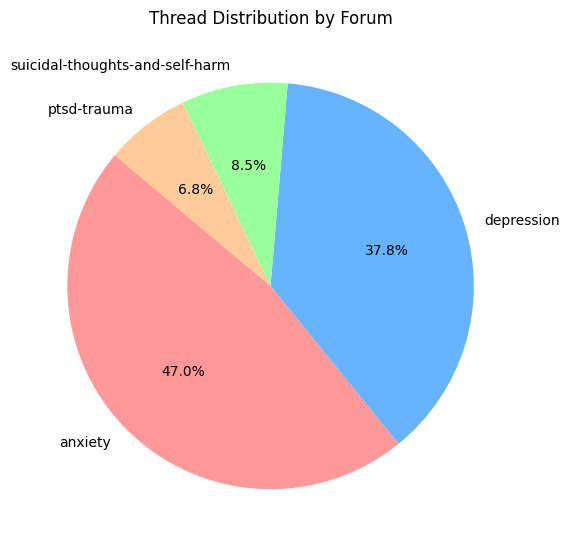

In [16]:
# Threads per forum

#Distribution of Threads by Forum (pie chart)
custom_colors = [ '#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#E6E6FA']
forum_dist = df['forum_name'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(forum_dist, labels=forum_dist.index, autopct='%1.1f%%', startangle=140,colors=custom_colors)
plt.title("Thread Distribution by Forum")
plt.tight_layout()
plt.show()



/var/folders/v8/hnghsvb16hqgpbjwl4mg79rw0000gn/T/ipykernel_52112/97099035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='has_author_reply', y='no_of_comments', palette="coolwarm")


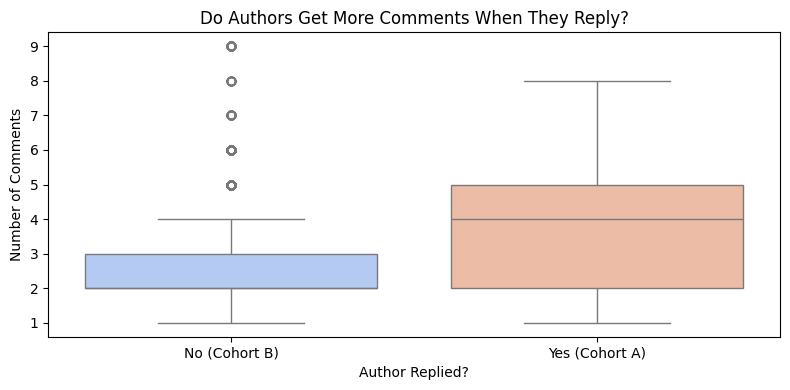

In [17]:
#  Do Authors Get More Comments?
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='has_author_reply', y='no_of_comments', palette="coolwarm")
plt.title("Do Authors Get More Comments When They Reply?")
plt.xlabel("Author Replied?")
plt.ylabel("Number of Comments")
plt.xticks([0, 1], ['No (Cohort B)', 'Yes (Cohort A)'])
plt.tight_layout()
plt.show()


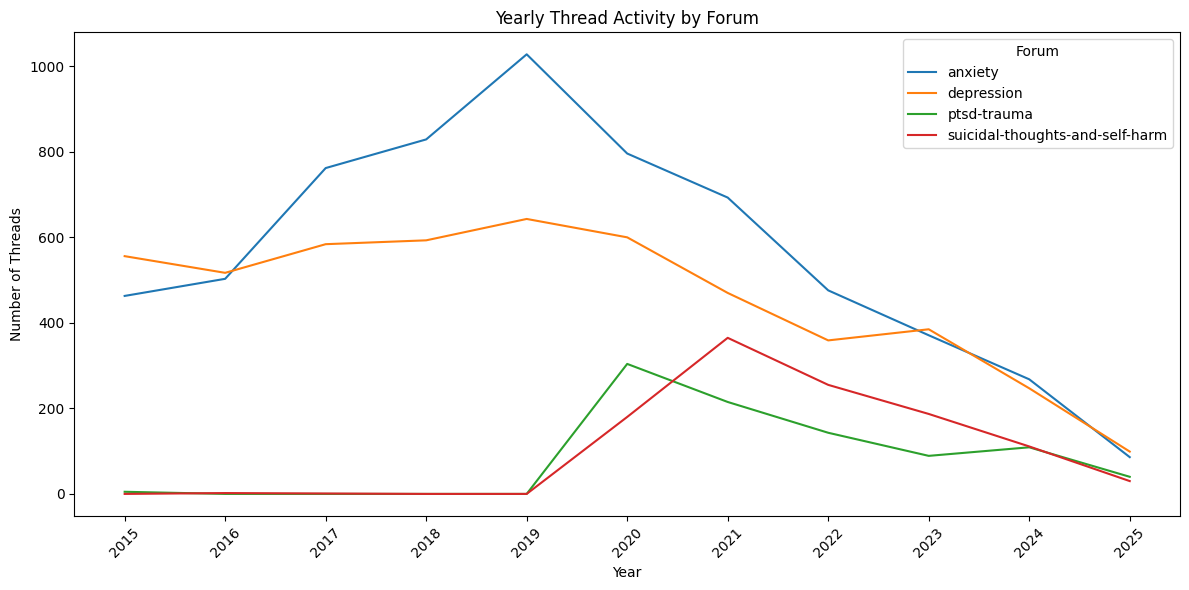

In [18]:
# Yearly Thread Activity by Forum
# Extract year from timestamp
df['year'] = df['post_timestamp'].dt.year

# Group by year and forum, then count
forum_yearly_counts = df.groupby(['year', 'forum_name']).size().reset_index(name='count')

# Pivot table: rows = year, columns = forum
pivot_yearly = forum_yearly_counts.pivot(index='year', columns='forum_name', values='count').fillna(0)

# Line plot for each forum over years
plt.figure(figsize=(12, 6))
for forum in pivot_yearly.columns:
    sns.lineplot(data=pivot_yearly, x=pivot_yearly.index, y=forum, label=forum)

plt.title("Yearly Thread Activity by Forum")
plt.xlabel("Year")
plt.ylabel("Number of Threads")
plt.xticks(pivot_yearly.index, rotation=45)
plt.legend(title='Forum')
plt.tight_layout()
plt.show()


In [ ]:
# # Forum Activity Over Time
# plt.figure(figsize=(10, 6))
# sns.heatmap(pivot_yearly.T, cmap="YlGnBu", annot=True, fmt=".0f")
# plt.title("Heatmap of Forum Activity by Year")
# plt.xlabel("Year")
# plt.ylabel("Forum")
# plt.tight_layout()
# plt.show()

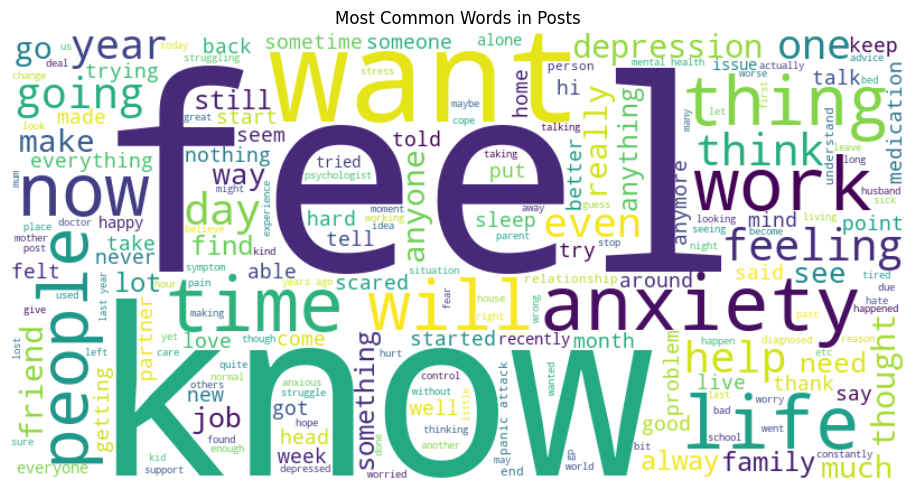

In [20]:
# Word Cloud 
text_all = " ".join(df['post_content_llm'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Posts")
plt.tight_layout()
plt.show()

In [ ]:

# # ANAGRAM ANALYSIS 

# def find_anagram_families(text_series, min_length=4, top_n=15):
#     word_groups = defaultdict(set)

#     # Collect words from posts
#     all_words = " ".join(text_series.dropna()).lower().split()
#     for word in all_words:
#         word_cleaned = re.sub(r'[^a-z]', '', word)
#         if len(word_cleaned) >= min_length:
#             key = ''.join(sorted(word_cleaned))
#             word_groups[key].add(word_cleaned)

#     # Filter only groups with more than 1 distinct word (true anagrams)
#     anagram_families = {k: list(v) for k, v in word_groups.items() if len(v) > 1}

#     # Convert to DataFrame with frequency
#     data = []
#     for key, words in anagram_families.items():
#         data.append({
#             "Anagram Key": key,
#             "Words": ", ".join(sorted(words)),
#             "Count": len(words)
#         })

#     df_anagrams = pd.DataFrame(data).sort_values(by="Count", ascending=False).head(top_n)
#     return df_anagrams

# # Run on post content
# anagram_df = find_anagram_families(df['post_content_llm'])

# # Display
# print("\nTop Anagram Groups Found in Posts:")
# print(anagram_df)

# # Plot
# plt.figure(figsize=(10, 5))
# sns.barplot(data=anagram_df, x="Count", y="Words", palette="cool")
# plt.title("Top Anagram Families in Post Content")
# plt.xlabel("Family Size")
# plt.ylabel("Anagram Words")
# plt.tight_layout()
# plt.show()


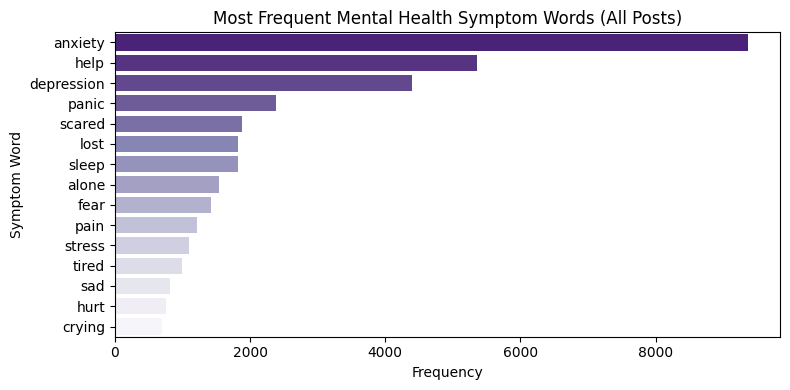

In [21]:
# Symptom Keyword Frequency
mental_health_keywords = {
    "anxiety", "depression", "panic", "hopeless", "worthless", "alone", "guilt", "shame",
    "suicidal", "selfharm", "empty", "scared", "fear", "overwhelmed", "sad", "tired", "lost",
    "angry", "crying", "stress", "sleep", "help", "hurt", "pain", "abuse", "grief", "broken",
    "unsafe", "abandoned", "ignored", "isolated", "triggered", "dizzy", "numb"
}
def get_symptom_words(text_series, lexicon, top_n=15):
    all_words = " ".join(text_series.dropna()).lower().split()
    filtered = [word for word in all_words if word in lexicon]
    return pd.DataFrame(Counter(filtered).most_common(top_n), columns=['Word', 'Count'])


top_symptoms_overall = get_symptom_words(df['post_content_llm'], mental_health_keywords)

plt.figure(figsize=(8, 4))
sns.barplot(data=top_symptoms_overall, x='Count', y='Word', palette='Purples_r',hue='Word', dodge=False, legend=False)
plt.title("Most Frequent Mental Health Symptom Words (All Posts)")
plt.xlabel("Frequency")
plt.ylabel("Symptom Word")
plt.tight_layout()
plt.show()

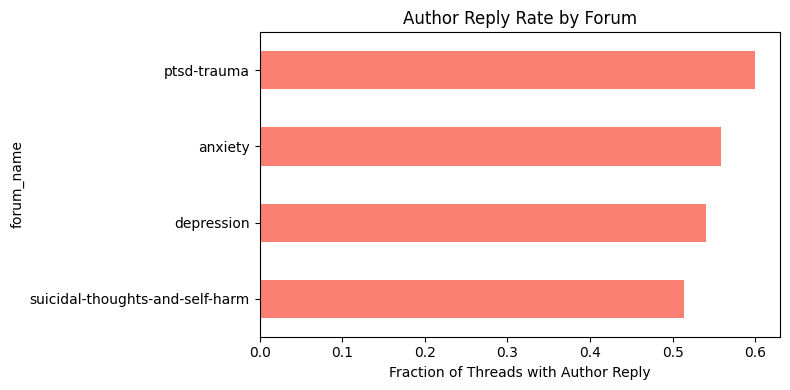

In [22]:
# Author Reply Rate by Forum
reply_ratio = df.groupby('forum_name')['has_author_reply'].mean().sort_values()
plt.figure(figsize=(8, 4))
reply_ratio.plot(kind='barh', color='salmon')
plt.title("Author Reply Rate by Forum")
plt.xlabel("Fraction of Threads with Author Reply")
plt.tight_layout()
plt.show()

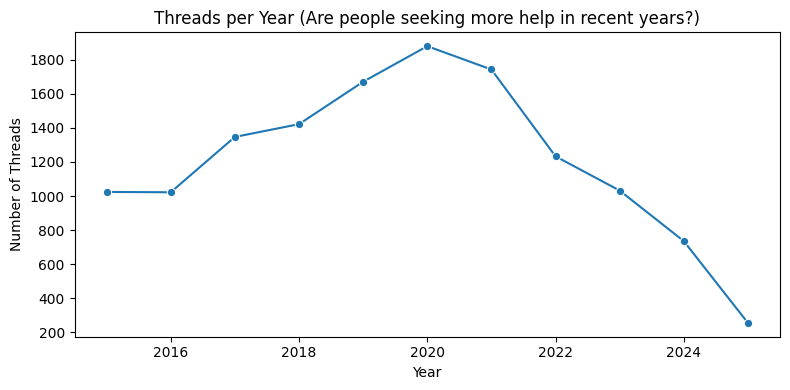

In [23]:
# Time trend of threads
df['year'] = df['post_timestamp'].dt.year
yearly_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Threads per Year (Are people seeking more help in recent years?)")
plt.xlabel("Year")
plt.ylabel("Number of Threads")
plt.tight_layout()
plt.show()

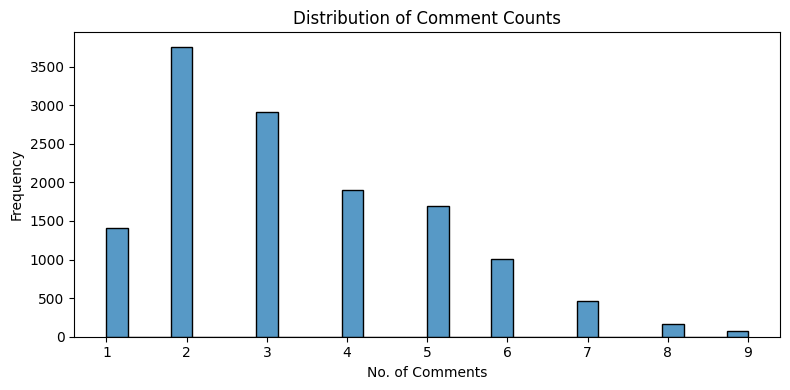

In [24]:
# Distribution of comment counts
plt.figure(figsize=(8, 4))
sns.histplot(df['no_of_comments'], bins=30)
plt.title("Distribution of Comment Counts")
plt.xlabel("No. of Comments")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()